In [1]:
import tensorflow as tf

# Check if TensorFlow is using GPU
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Available:", tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

# Optional: see detailed device list
print("Devices:", tf.config.list_logical_devices())


D:\Anacnda\envs\tf-gpu-2.10\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Num GPUs Available: 1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: True
Devices: [LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [2]:
from tensorflow import keras
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

(trainX,trainY), (testX,testY)= load_data()

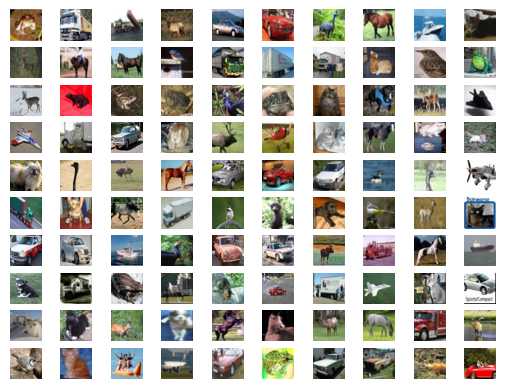

In [3]:
for i in range(100):
  pyplot.subplot(10,10,1+i)

  pyplot.axis('off')
  pyplot.imshow(trainX[i])

pyplot.show()


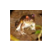

In [4]:

pyplot.subplot(10,10,1)
pyplot.axis('off')
pyplot.imshow(trainX[0])
pyplot.show()

In [5]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import *
from keras.utils import plot_model
import numpy as np

In [6]:
def def_discriminator(input_shape=(32,32,3)):
  model= Sequential()
  model.add(Conv2D(64, (3,3), padding='same', input_shape=input_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))


  optimizer= Adam(learning_rate=0.0002, beta_1=0.5)

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model





In [7]:
model= def_discriminator()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [8]:
plot_model(model, to_file='discriminator.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
 def load_real_samples():
  (trainX,_),(_,_)= load_data()

  X= trainX.astype('float32')   ## to deal with compatibility issue with algorithms\
  X=(X-127.5)/127.5 ## recommended

  return X

(50000, 32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


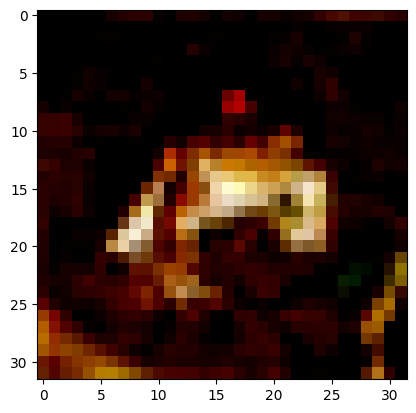

In [10]:
print(load_real_samples().shape)

X=load_real_samples()

pyplot.imshow(X[0])

In [11]:
def generate_real_samples(dataset, n_samples):
  ix= np.random.randint(0,dataset.shape[0], n_samples)
  X=dataset[ix]

  y= np.ones((n_samples,1))

  return X,y

In [12]:
X,y= generate_real_samples(X,64)

In [13]:
X.shape

(64, 32, 32, 3)

In [14]:
y.shape

(64, 1)

In [15]:
def generate_fake_samples(n_samples):
  X= np.random.rand(32*32*3*n_samples)
  X=-1 + 2*X
  X=X.reshape((n_samples,32,32,3))

  y=np.zeros((n_samples,1))

  return X,y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 32, 32, 3) (64, 1)


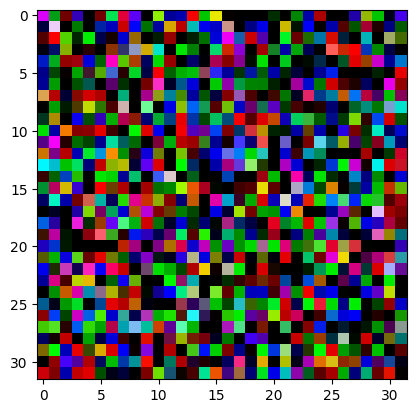

In [16]:
X,y= generate_fake_samples(64)
print(X.shape,y.shape)
pyplot.imshow(X[0])

In [17]:
def train_discriminator(model,dataset, n_iter=30, n_batches=128):
  half_batch= int(n_batches/2)

  for i in range(n_iter):
    X_real,y_real= generate_real_samples(dataset,half_batch)

    _,real_acc= model.train_on_batch(X_real,y_real)

    X_fake,y_fake= generate_fake_samples(half_batch)

    _, fake_acc= model.train_on_batch(X_fake,y_fake)

    print('>%d real=%.0f%% fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))

In [18]:
model= def_discriminator()
dataset= load_real_samples()

train_discriminator(model,dataset)

>1 real=62% fake=3%
>2 real=100% fake=5%
>3 real=100% fake=22%
>4 real=98% fake=34%
>5 real=98% fake=83%
>6 real=100% fake=95%
>7 real=97% fake=100%
>8 real=98% fake=100%
>9 real=100% fake=100%
>10 real=98% fake=100%
>11 real=97% fake=100%
>12 real=97% fake=100%
>13 real=94% fake=100%
>14 real=97% fake=100%
>15 real=98% fake=100%
>16 real=100% fake=100%
>17 real=98% fake=100%
>18 real=98% fake=100%
>19 real=100% fake=100%
>20 real=100% fake=100%
>21 real=100% fake=100%
>22 real=100% fake=100%
>23 real=100% fake=100%
>24 real=100% fake=100%
>25 real=100% fake=100%
>26 real=100% fake=100%
>27 real=100% fake=100%
>28 real=100% fake=100%
>29 real=100% fake=100%
>30 real=100% fake=100%


In [19]:
def define_generator(latent_dim):
  model= Sequential()

  n_nodes = 256*4*4

  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4,4,256)))


  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))##upsampling(4x4 --->8x8--->16x16---->32x32)
  model.add(LeakyReLU(alpha=0.2))


  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same')) ## upsampling
  model.add(LeakyReLU(alpha=0.2))


  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3,(3,3), activation= 'tanh', padding='same'))

  return model



In [20]:
latent_dim=100

model= define_generator(latent_dim)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                            

In [21]:
plot_model(model, to_file='generator.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [22]:
def generate_latent_points(latent_dim, n_samples):
  X_input= np.random.rand(latent_dim*n_samples)
  X_input=X_input.reshape(n_samples,latent_dim)
  return X_input

In [23]:
X_input= generate_latent_points(100,64)
X_input.shape

(64, 100)

In [24]:
def generate_fake_samples(g_model,latent_dim, n_samples):
  x_input= generate_latent_points(latent_dim,n_samples)
  X= g_model.predict(x_input)

  y=np.zeros((n_samples,1))

  return X,y

2/2 [==============================] - 1s 12ms/step


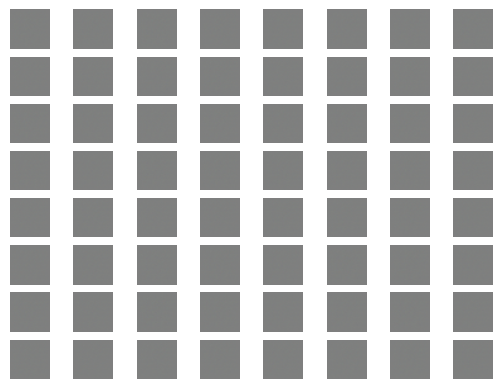

In [25]:
latent_dim=100


model= define_generator(latent_dim)
n_samples= 64
X,_= generate_fake_samples(model,latent_dim,n_samples )

X = (X+1)/2

for i in range(n_samples):

  pyplot.subplot(8,8,1+i)
  pyplot.axis('off')
  pyplot.imshow(X[i])

pyplot.show()

In [26]:
def Gan(g_model, d_model):
  d_model.trainable= False ## only generator's weights will be updated
  model= Sequential()
  model.add(g_model)
  model.add(d_model)

  opt= Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

In [27]:
latent_dim =100

d_model= def_discriminator()

g_model=define_generator(latent_dim)

gan_model= Gan(g_model,d_model)

gan_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


In [28]:
plot_model(gan_model, to_file='gan.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
def train_gan(gan_model, g_model,d_model, latent_dim, n_epochs=100, n_batch=128):
  batch_per_epoch= int(dataset.shape[0]/n_batch)

  half_batch= int(n_batch/2)


  for i in range(n_epochs):
    for j in range(batch_per_epoch):
      X_real,y_real= generate_real_samples(dataset,half_batch)

      d_loss1, _ = d_model.train_on_batch(X_real, y_real)

      X_fake,y_fake= generate_fake_samples(g_model,latent_dim,half_batch)

      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)

      X_gan= generate_latent_points(latent_dim,n_batch)
      y_gan= np.ones((n_batch,1))

      g_loss= gan_model.train_on_batch(X_gan,y_gan)

      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f'%(i+1,j+1,batch_per_epoch,d_loss1,d_loss2,g_loss))

    if (i+1)%10==0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)


In [30]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
  X_real, y_real = generate_real_samples(dataset, n_samples)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  _,acc_fake= d_model.evaluate(x_fake,y_fake, verbose=0)

  print('Accuracy real: %.0f%%, fake: %.0f%%'%(acc_real*100,acc_fake*100))

  save_plot(x_fake, epoch)

  filename= 'generator_model_%03d.h5'%(epoch+1)
  g_model.save(filename)

In [31]:
def save_plot(examples, epoch, n=10):
  examples= (examples+1)/2.0

  for i in range(n*n):
    pyplot.subplot(n,n,i+1)
    pyplot.axis('off')
    pyplot.imshow(examples[i])

  filename= 'generated_plot_e%03d.png'%(epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [32]:
train_gan(gan_model, g_model,d_model, latent_dim, n_epochs=100, n_batch=128)

2/2 [==============================] - 0s 49ms/step
>1, 1/390, d1=0.697, d2=0.695 g=0.692
2/2 [==============================] - 0s 10ms/step
>1, 2/390, d1=0.640, d2=0.697 g=0.690
2/2 [==============================] - 0s 13ms/step
>1, 3/390, d1=0.589, d2=0.701 g=0.687
2/2 [==============================] - 0s 7ms/step
>1, 4/390, d1=0.501, d2=0.709 g=0.680
2/2 [==============================] - 0s 8ms/step
>1, 5/390, d1=0.385, d2=0.730 g=0.663
2/2 [==============================] - 0s 10ms/step
>1, 6/390, d1=0.280, d2=0.777 g=0.633
2/2 [==============================] - 0s 10ms/step
>1, 7/390, d1=0.176, d2=0.847 g=0.610
2/2 [==============================] - 0s 10ms/step
>1, 8/390, d1=0.123, d2=0.883 g=0.631
2/2 [==============================] - 0s 7ms/step
>1, 9/390, d1=0.136, d2=0.814 g=0.720
2/2 [==============================] - 0s 8ms/step
>1, 10/390, d1=0.097, d2=0.662 g=0.868
2/2 [==============================] - 0s 7ms/step
>1, 11/390, d1=0.073, d2=0.543 g=1.035
2/2 [========